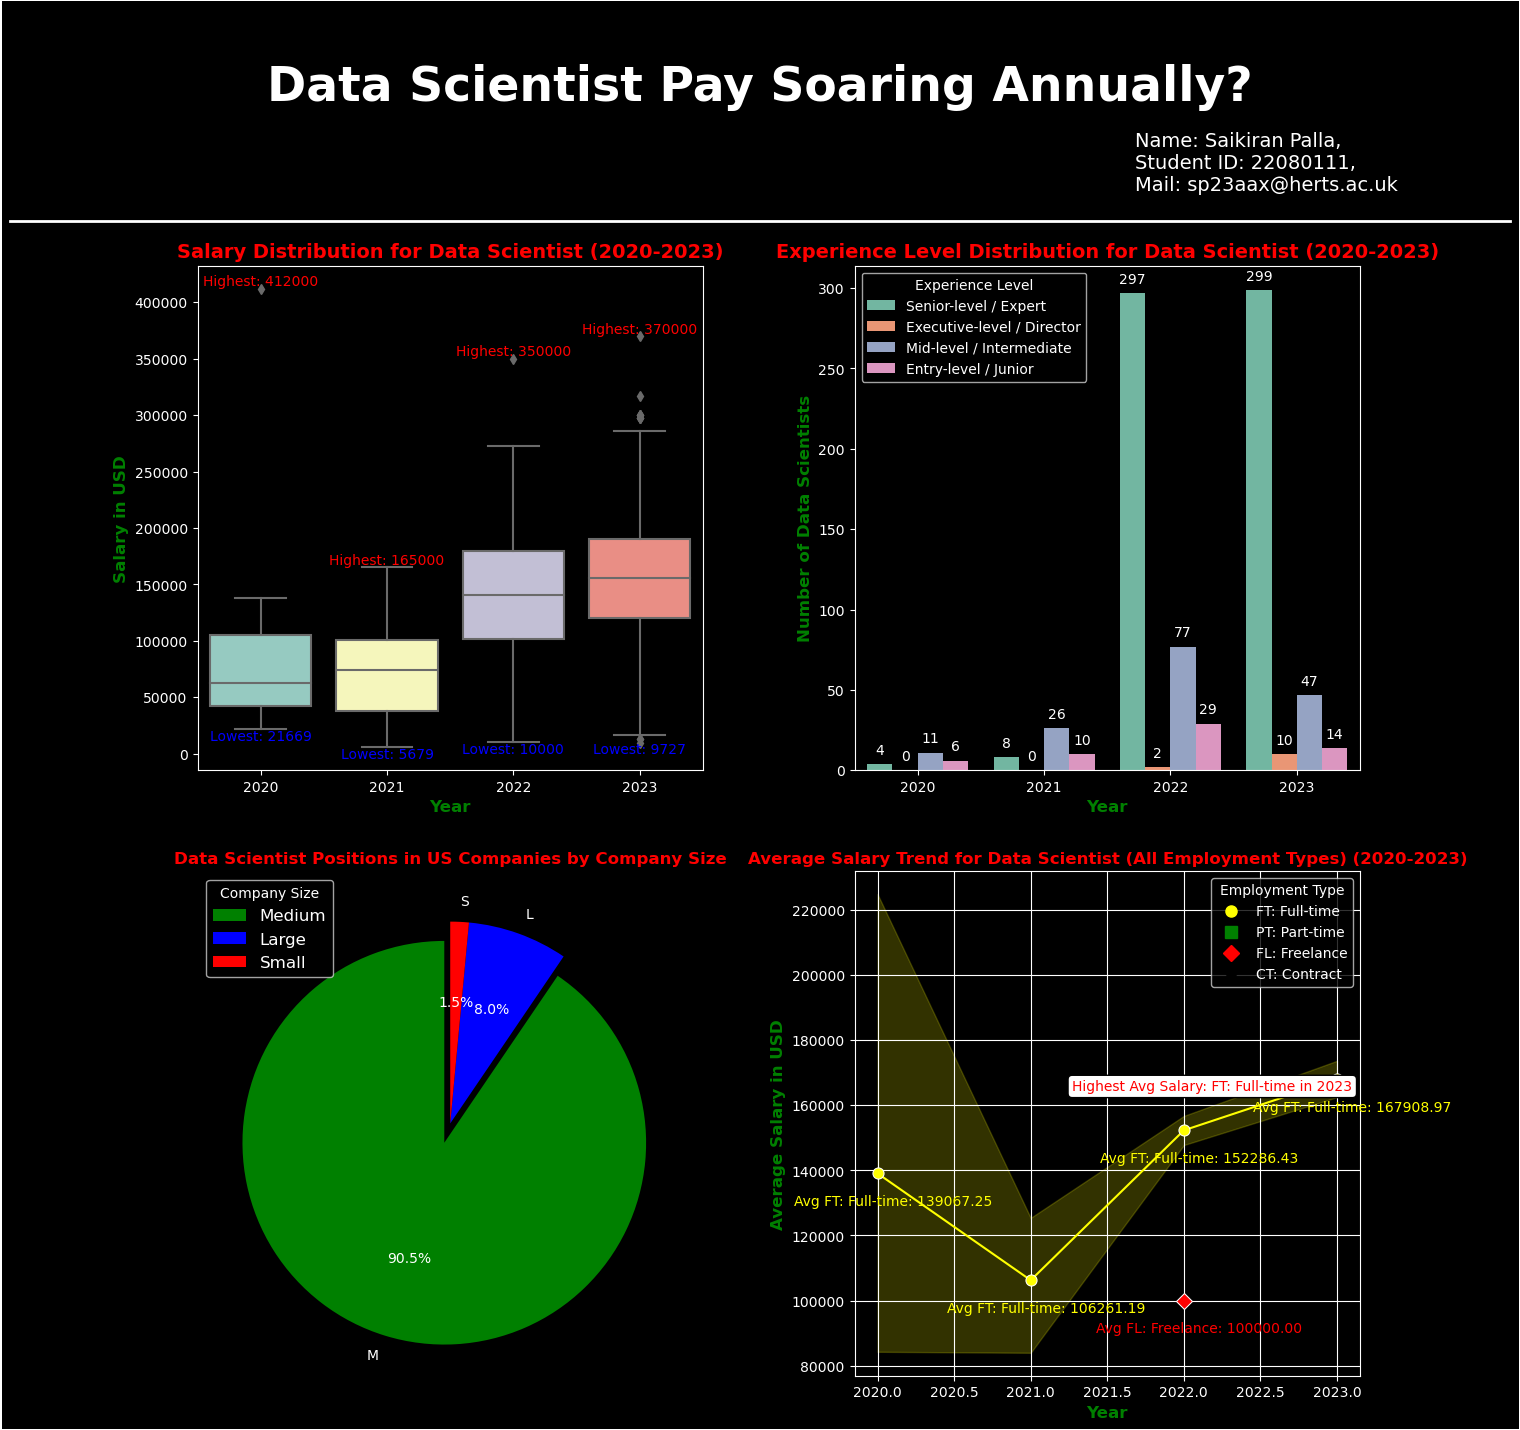

In [3]:
# import required libararies to infographics visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines

# Loading the CSV formated dataset to the python script
df = pd.read_csv('ds_salaries.csv')

#  handling missing values in the data 
nan_values = df.isna()
df_nan = df.dropna()
new_df = pd.DataFrame(df_nan).reset_index(drop=True)

# Computing the summary statistics including non-numerical columns 
summary_stats_all = new_df.describe(include='all')

# Saving the summary statistics to a CSV file
summary_stats_all.to_csv("summary_statistics.csv", index=False)

# Saving the summary statistics to the text file 
with open("summary_statistics.txt", "w") as text_file:
    text_file.write(summary_stats_all.to_string())

# Setting dark black background color for the A4 page
plt.style.use('dark_background')

# Creating a white-bordered to the A4 sized 
fig, axs = plt.subplots(2, 2, figsize=(15, 15), edgecolor='white', linewidth=2)

# Adding header to A4 page title and my details 
fig.text(0.5, 0.98, '\n ')
fig.text(0.5, 0.96, '\nData Scientist Pay Soaring Annually?', color='white', weight='bold', fontsize=34, ha='center')
fig.text(0.75, 0.90, 'Name: Saikiran Palla,\nStudent ID: 22080111,\nMail: sp23aax@herts.ac.uk', color='white', fontsize=14, ha='left')

# Adding a white divider line
divider_line = mlines.Line2D([0, 1], [0.88, 0.88], color='white', linewidth=2, transform=fig.transFigure)
fig.lines.extend([divider_line])
# Adding some space for the header and divider line
plt.subplots_adjust(top=0.85)


# Visualization 1: Salary Distribution Over Years
filtered_data = df[df['job_title'] == 'Data Scientist']

# Subplot 1
sns.boxplot(x='work_year', y='salary_in_usd', data=filtered_data, ax=axs[0, 0])
for year in sorted(filtered_data['work_year'].unique()):
    year_data = filtered_data[filtered_data['work_year'] == year]
    highest_salary = year_data['salary_in_usd'].max()
    lowest_salary = year_data['salary_in_usd'].min()
    axs[0, 0].annotate(f'Highest: {highest_salary}', xy=(year-2020, highest_salary), ha='center', va='bottom', color='red', fontsize=10)
    axs[0, 0].annotate(f'Lowest: {lowest_salary}', xy=(year-2020, lowest_salary), ha='center', va='top', color='blue', fontsize=10)
axs[0, 0].set_title('Salary Distribution for Data Scientist (2020-2023)', color='red', weight='bold', fontsize=14)
axs[0, 0].set_xlabel('Year', color='green', weight='bold', fontsize=12)
axs[0, 0].set_ylabel('Salary in USD', color='green', weight='bold', fontsize=12)

# Visualization 2: Experience Level Distribution
level_mapping = {'EN': 'Entry-level / Junior', 'MI': 'Mid-level / Intermediate', 'SE': 'Senior-level / Expert', 'EX': 'Executive-level / Director'}
filtered_data.loc[:, 'experience_level'] = filtered_data['experience_level'].map(level_mapping)
custom_palette = sns.color_palette("Set2", n_colors=len(filtered_data['experience_level'].unique()))
sns.countplot(x='work_year', hue='experience_level', data=filtered_data, palette=custom_palette, ax=axs[0, 1])
for p in axs[0, 1].patches:
    axs[0, 1].annotate(f'{round(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
axs[0, 1].set_title('Experience Level Distribution for Data Scientist (2020-2023)', color='red', weight='bold', fontsize=14)
axs[0, 1].set_xlabel('Year', color='green', weight='bold', fontsize=12)
axs[0, 1].set_ylabel('Number of Data Scientists', color='green', weight='bold', fontsize=12)
axs[0, 1].legend(title='Experience Level')

# Add spaceing to the subplot that will be visuable clearly height and width
plt.subplots_adjust(hspace=0.2, wspace=0.3)

# Subplot 3: Company Size Distribution in the US
filtered_data_company = df[(df['job_title'] == 'Data Scientist') & (df['company_location'] == 'US')]
percentage_distribution = filtered_data_company['company_size'].value_counts(normalize=True) * 100
legend_labels = {'S': 'Small', 'M': 'Medium', 'L': 'Large'}
colors = ['green', 'blue', 'red']
axs[1, 0].pie(percentage_distribution, labels=percentage_distribution.index, autopct='%1.1f%%', startangle=90, explode=(0.1, 0, 0), colors=colors)
axs[1, 0].set_title('Data Scientist Positions in US Companies by Company Size', color='red', weight='bold', fontsize=12)
axs[1, 0].legend([legend_labels[label] for label in percentage_distribution.index], title='Company Size', loc='upper left', fontsize=12)

# Subplot 4: Average Salary Trend for Different Employment Types
selected_employment_types = filtered_data_company['employment_type'].unique()
selected_employment_types = ['FT', 'PT', 'FL', 'CT']
employment_type_info = {
    'FT': {'label': 'FT: Full-time', 'color': 'yellow', 'symbol': 'o'},
    'PT': {'label': 'PT: Part-time', 'color': 'green', 'symbol': 's'},
    'FL': {'label': 'FL: Freelance', 'color': 'red', 'symbol': 'D'},
    'CT': {'label': 'CT: Contract', 'color': 'black', 'symbol': 'd'}
}
avg_salary_dict = {}
for i, emp_type in enumerate(selected_employment_types):
    emp_type_data = filtered_data_company[filtered_data_company['employment_type'] == emp_type]
    color = employment_type_info[emp_type]['color']
    symbol = employment_type_info[emp_type]['symbol']
    sns.lineplot(x='work_year', y='salary_in_usd', data=emp_type_data, label=f'{employment_type_info[emp_type]["label"]}', color=color, marker=symbol, markersize=8, ax=axs[1, 1])
    for year in sorted(emp_type_data['work_year'].unique()):
        avg_salary = emp_type_data[emp_type_data['work_year'] == year]['salary_in_usd'].mean()
        avg_salary_dict[(year, emp_type)] = avg_salary
        axs[1, 1].annotate(f'Avg {employment_type_info[emp_type]["label"]}: {avg_salary:.2f}', xy=(year + 0.1, avg_salary), ha='center', va='top', color=color, textcoords='offset points', xytext=(0, -15))
max_avg_entry = max(avg_salary_dict, key=avg_salary_dict.get)
max_avg_label = employment_type_info[max_avg_entry[1]]['label']
max_avg_position = (max(filtered_data_company['work_year']) + 0.1, avg_salary_dict[max_avg_entry])
axs[1, 1].annotate(f'Highest Avg Salary: {max_avg_label} in {max_avg_entry[0]}', xy=max_avg_position, ha='right', va='top', color='red', backgroundcolor='blue', bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))
legend_handles = [mlines.Line2D([], [], color=employment_type_info[emp_type]['color'], marker=employment_type_info[emp_type]['symbol'], linestyle='None', markersize=8, label=employment_type_info[emp_type]['label']) for emp_type in selected_employment_types]
axs[1, 1].legend(handles=legend_handles, title='Employment Type')
axs[1, 1].set_title('Average Salary Trend for Data Scientist (All Employment Types) (2020-2023)', color='red', weight='bold', fontsize=12)
axs[1, 1].set_xlabel('Year', color='green', weight='bold', fontsize=12)
axs[1, 1].set_ylabel('Average Salary in USD', color='green', weight='bold', fontsize=12)
axs[1, 1].grid(True)

# Saving the infographic as a PNG file
plt.savefig("22080111.png", dpi=300)

# Show the plot instead of saving it
plt.show()